In [92]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import sys
sys.path.append(path)
import Data_cleaner
cleaner = Data_cleaner.data_cleaner()

In [93]:
path = 'C:/Users/ok/Documents/House_data/House_data/Scripts/'
test_path = 'C:/Users/ok/Documents/House_data/House_data/Data/test.csv'
train_path = 'C:/Users/ok/Documents/House_data/House_data/Data/clean_data.csv'

In [94]:
# import the cleanded train data and test data
test = pd.read_csv(test_path)
train = pd.read_csv(train_path)

In [96]:
# lets check if there are any nan values in the test data
cleaner.percent_missing(test)
# lets use the same technique we used to clean the train data

6.75

In [97]:
# For the LotFrontage test, I have decided to impute the mean value of the naighborhood LotFrontage area value.
test["LotFrontage"] = test.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.mean()))

# For Catagorical catagories(except Electrical), since the NaN values represent the non avaliablity of the attribuite, lets replace the m with 'none'ArithmeticError
cleaner.Nan_to_none(test)

# For datas under the numerical catagories, since the NaN value represents the non avaliability of that attribute, let's replace them with 0.
cleaner.Nan_to_zero(test)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,none,Reg,Lvl,AllPub,...,120,0,none,MnPrv,none,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,none,IR1,Lvl,AllPub,...,0,0,none,none,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,none,IR1,Lvl,AllPub,...,0,0,none,MnPrv,none,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,none,IR1,Lvl,AllPub,...,0,0,none,none,none,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,none,IR1,HLS,AllPub,...,144,0,none,none,none,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,none,Reg,Lvl,AllPub,...,0,0,none,none,none,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,none,Reg,Lvl,AllPub,...,0,0,none,none,none,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,none,Reg,Lvl,AllPub,...,0,0,none,none,none,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,none,Reg,Lvl,AllPub,...,0,0,none,MnPrv,Shed,700,7,2006,WD,Normal


In [98]:
#For the rest attribuite, its better to drop the column.
test = test.fillna('mean')

In [99]:
cleaner.percent_missing(test)

0.0

In [100]:
# catagorical preprocessing
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [101]:
# Split the data into prediction target 'y' ('salesprice), and attributes 'X'
y = train['SalePrice']
X = train.drop('SalePrice', axis=1)

In [102]:
# First lets split the training dataset into test and train and then use them to compare the two choosen models (XGBRegressor and RandomForestRegressor)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

In [103]:
# Before fiting the data into the model, lets find the best number of estimators for both models
def mae_score(estimator):
    model1 = RandomForestRegressor(n_estimators= estimator, random_state=0)
    val_score = -1 * cross_val_score(model1, X, y, cv=2, scoring='neg_mean_absolute_error')

    return val_score.mean()

In [78]:
result = {}
estimator = [50, 100, 200]

for i in estimator:
    result[i] = mae_score(i)


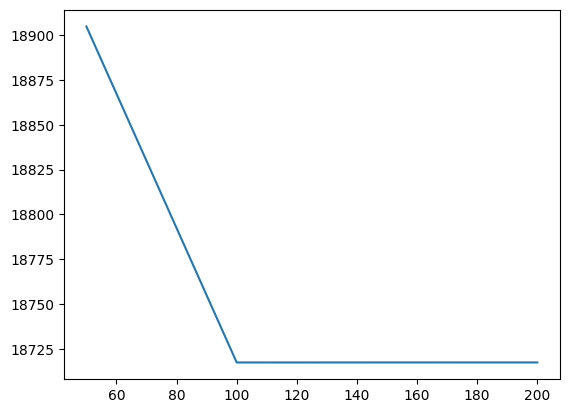

In [79]:

%matplotlib inline
plt.plot(list(result.keys()), list(result.values()))
plt.show()

In [104]:
# Before fiting the data into the model, lets find the best number of estimators for both models
def mae_score(estimator):
    model2 = XGBRegressor(n_estimators = estimator, learning_rate = 0.05, n_jobs=4)
    val_score = -1 * cross_val_score(model2, X, y, cv=2, scoring='neg_mean_absolute_error')

    return val_score.mean()

In [105]:
result2 = {}
estimator = [25, 50, 100, 200]

for i in estimator:
    result2[i] = mae_score(i)

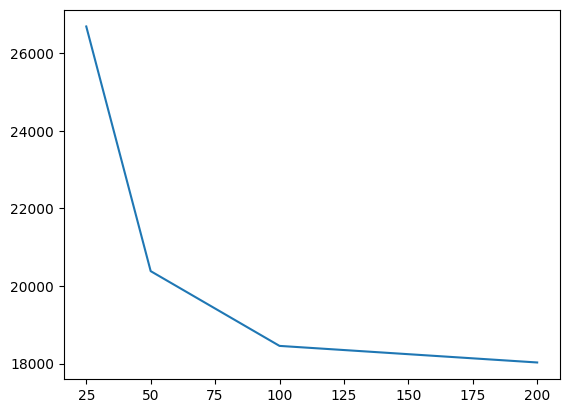

In [106]:

%matplotlib inline
plt.plot(list(result2.keys()), list(result2.values()))
plt.show()

In [108]:
# so lets use 200 estimators for XGBoost and 100 estimators for RandomForest
modelX = XGBRegressor(n_estimators = 200, learning_rate = 0.05, n_jobs=4)
modelR = RandomForestRegressor(n_estimators= 100, random_state=0)


In [109]:
modelR.fit(X_train, y_train)
prediction1 = modelR.predict(X_val)
Error = mean_absolute_error(y_val, prediction1)
print(Error)

14967.348144329895


In [110]:
modelX.fit(X_train, y_train)
prediction2 = modelX.predict(X_val)
Error2 = mean_absolute_error(y_val, prediction2)
print(Error2)

14538.103549183848


In [111]:
common_cols = test.columns.intersection(X.columns)

# Drop the columns that are not in common
test = test[common_cols]
X = X[common_cols]

In [112]:
#Hence RGBoost has the upper hand, now lets train it using the whole data
model = XGBRegressor(n_estimators = 200, learning_rate = 0.05, n_jobs=4)
model.fit(X, y)
prediction = model.predict(test)

In [91]:
submission = pd.DataFrame({'Id': test['Id'], 'SalePrice': prediction})
submission.to_csv('C:/Users/ok/Documents/House_data/House_data/Data/submissions.csv', index=False)